In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("income.csv")
df.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [ ]:
# 1. Write the name of the variables with its datatype, description and categories of the variables.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [ ]:
df.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.describe(include='O')

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [ ]:
# 2. Identify if data is clean
df.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [ ]:
df = df.drop_duplicates()
df.shape

(28516, 13)

In [ ]:
cat_cols = df.drop(["age","capitalgain","capitalloss","hoursperweek"],axis = 1)
for i in cat_cols.columns:
    print(cat_cols[i].value_counts())
    print(" ")

 Private             19214
 Self-emp-not-inc     2431
 Local-gov            2014
 ?                    1605
 State-gov            1253
 Self-emp-inc         1049
 Federal-gov           929
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64
 
 HS-grad         8754
 Some-college    6275
 Bachelors       4666
 Masters         1604
 Assoc-voc       1315
 11th            1048
 Assoc-acdm      1041
 10th             855
 7th-8th          610
 Prof-school      549
 9th              499
 12th             398
 Doctorate        379
 5th-6th          313
 1st-4th          161
 Preschool         49
Name: EdType, dtype: int64
 
 Married-civ-spouse       12966
 Never-married             8980
 Divorced                  4188
 Separated                  994
 Widowed                    968
 Married-spouse-absent      397
 Married-AF-spouse           23
Name: maritalstatus, dtype: int64
 
 Prof-specialty       3783
 Exec-managerial      3646
 Adm-clerical         3291
 Craf

In [ ]:
# 3. Look for missing values
df = df.replace(r'[?]', float('NaN'),regex = True)
df = df.dropna().reset_index(drop = True)
df

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26899,33,Private,Masters,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,"greater than 50,000"
26900,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
26901,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
26902,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"


<Axes: xlabel='gender', ylabel='count'>

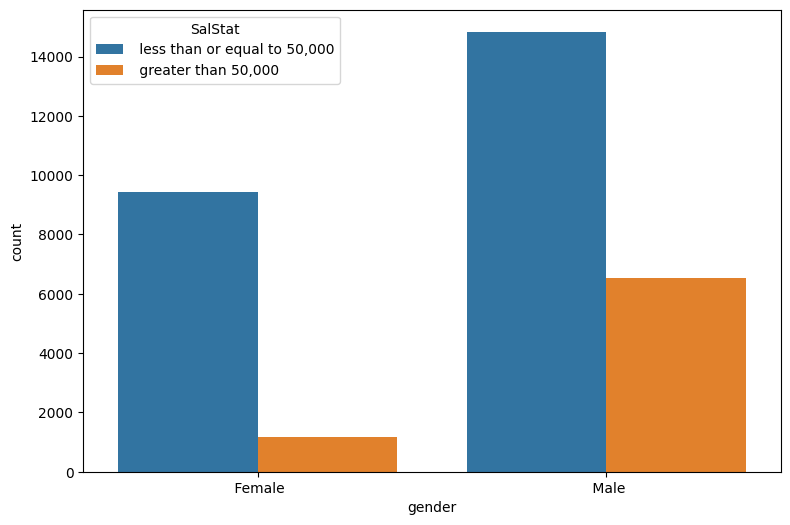

In [10]:
# 4. Identify variables influencing salary status and look for possible relationships between variables

# countplot to visualize the distribution of the target variable SalStat for each value of the gender
plt.figure(figsize = (9,6))
sns.countplot(x = "gender", hue = "SalStat",data = df)

<AxesSubplot:xlabel='relationship', ylabel='count'>

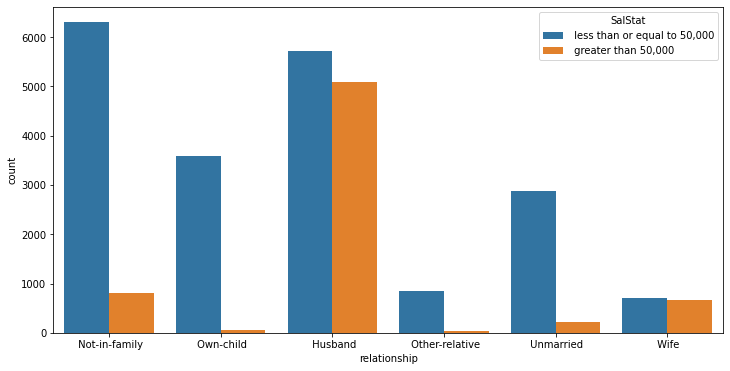

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(x = "relationship" , hue = "SalStat" , data = df)

<AxesSubplot:xlabel='relationship', ylabel='count'>

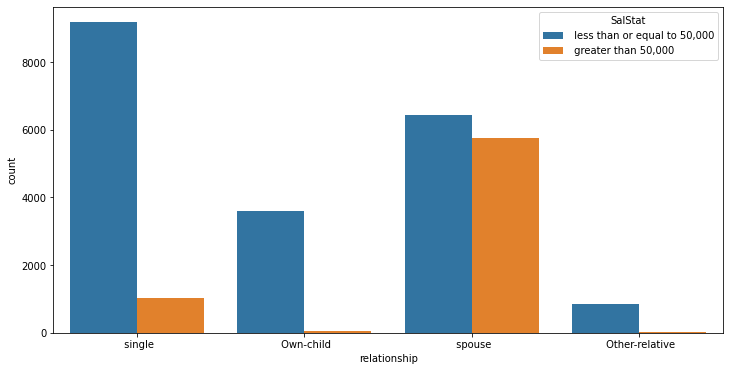

In [ ]:
new_cat = {
    r"Husband|Wife" : "spouse",
    r"Not-in-family|Unmarried" : "single",
}

df["relationship"] = df["relationship"].replace(new_cat, regex = True)
plt.figure(figsize = (12,6))
sns.countplot(x = "relationship" , hue = "SalStat" , data = df)

<AxesSubplot:xlabel='EdType', ylabel='count'>

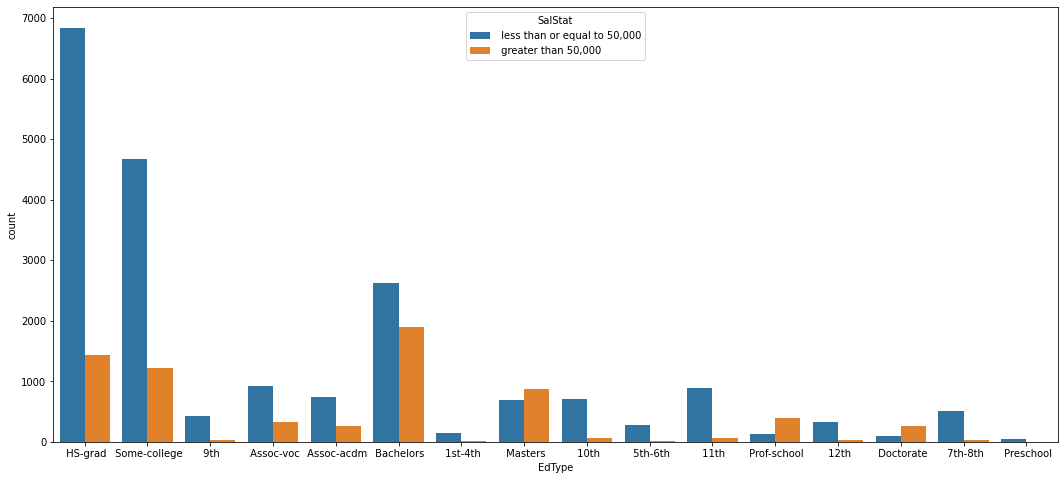

In [ ]:
plt.figure(figsize = (18,8))
sns.countplot(x = "EdType" , hue = "SalStat" , data = df)

<AxesSubplot:xlabel='EdType', ylabel='count'>

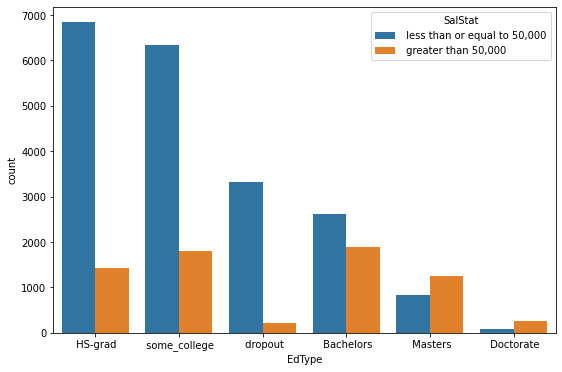

In [ ]:
new_cat = {
    r"Preschool|1st-4th|5th-6th|7th-8th|9th|10th|11th|12th" : "dropout",
    r"Some-college|Assoc-acdm|Assoc-voc" : "some_college",
    r"Prof-school" : "Masters" 
}

df["EdType"] = df["EdType"].replace(new_cat, regex = True)

plt.figure(figsize = (9,6))
sns.countplot(x = "EdType" , hue = "SalStat" , data = df)

<AxesSubplot:xlabel='occupation', ylabel='count'>

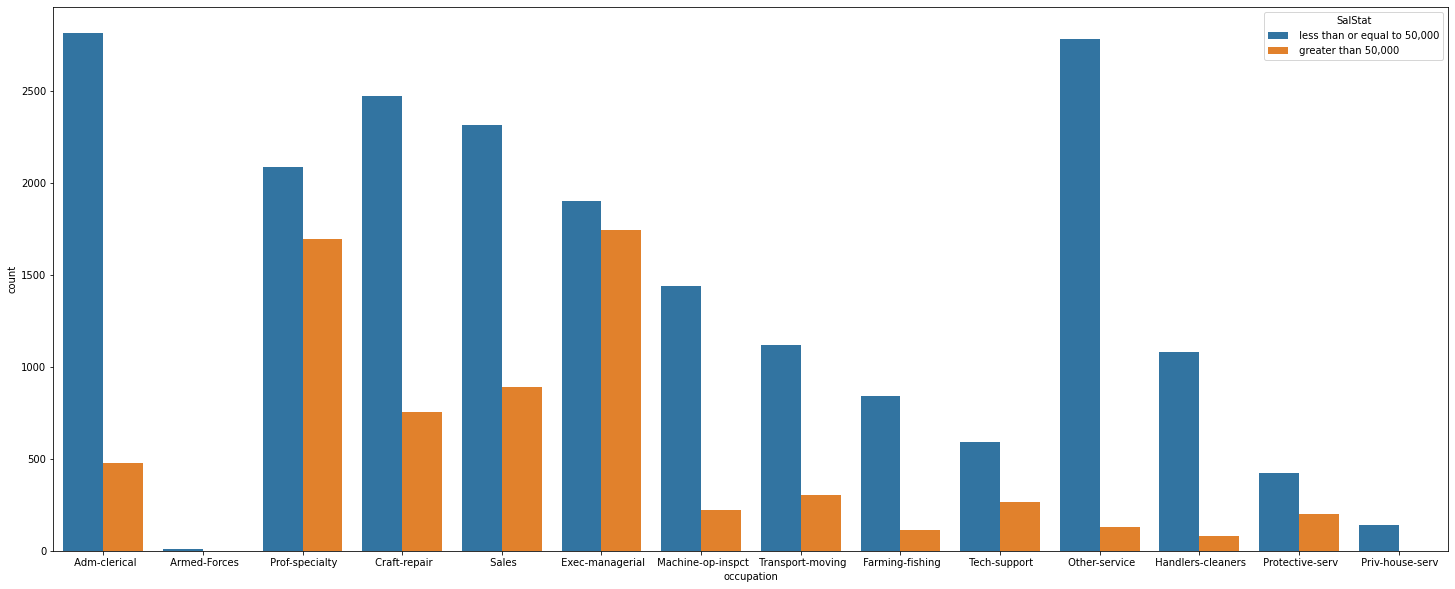

In [ ]:
plt.figure(figsize = (25,10))
sns.countplot(x = "occupation" , hue = "SalStat" , data = df)

<AxesSubplot:xlabel='race', ylabel='count'>

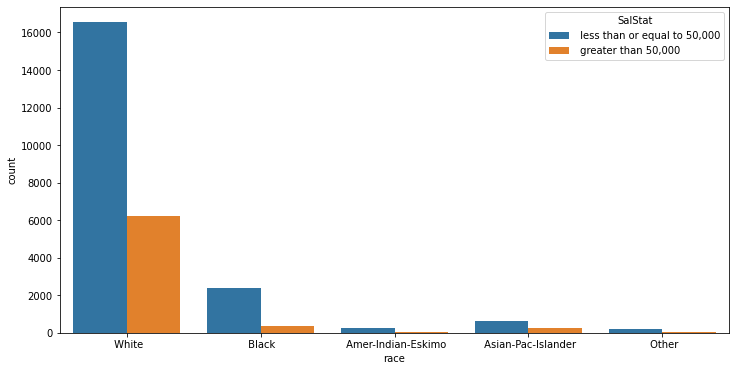

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(x = "race" , hue = "SalStat" , data = df)

<AxesSubplot:xlabel='JobType', ylabel='count'>

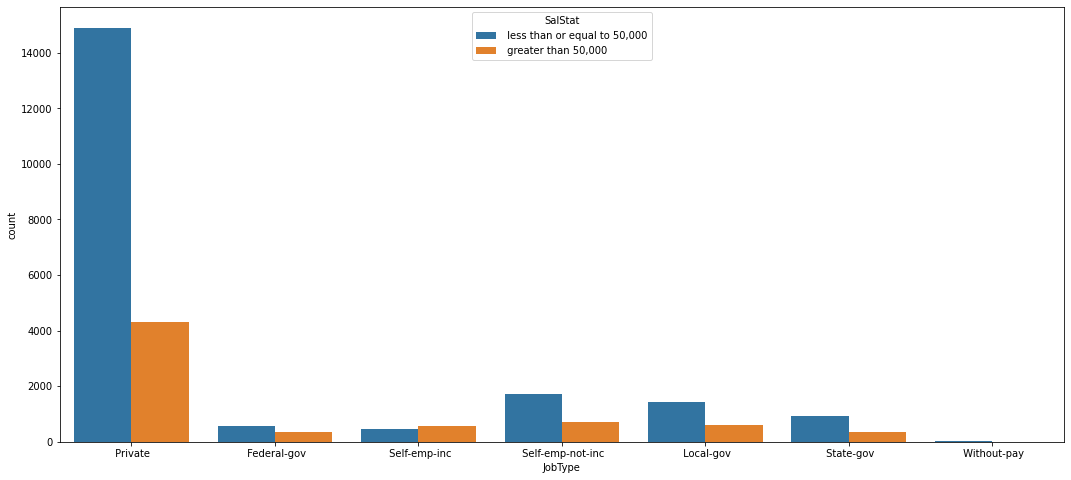

In [ ]:
plt.figure(figsize = (18,8))
sns.countplot(x = "JobType" , hue = "SalStat" , data = df)

<Axes: xlabel='hoursperweek', ylabel='SalStat'>

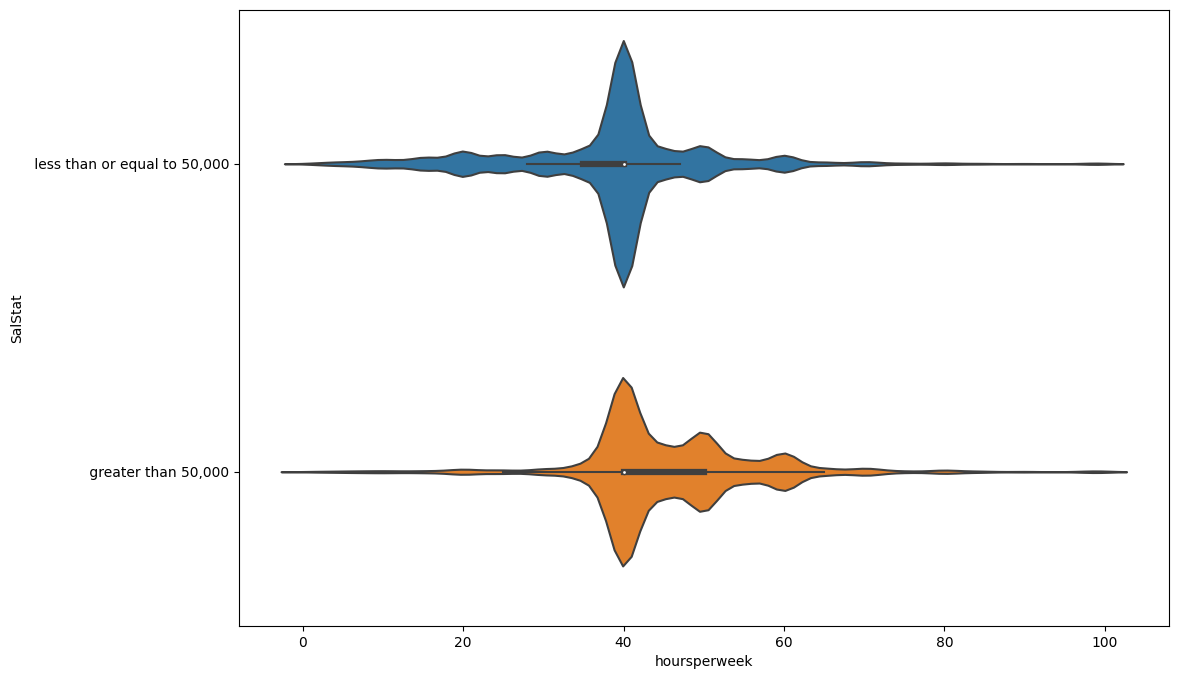

In [11]:
plt.figure(figsize = (12,8))
sns.violinplot(x = 'hoursperweek',y = 'SalStat',data = df)
#middle line used to represent median , left interqutile , right , dot that is outliers 

<Axes: xlabel='age', ylabel='SalStat'>

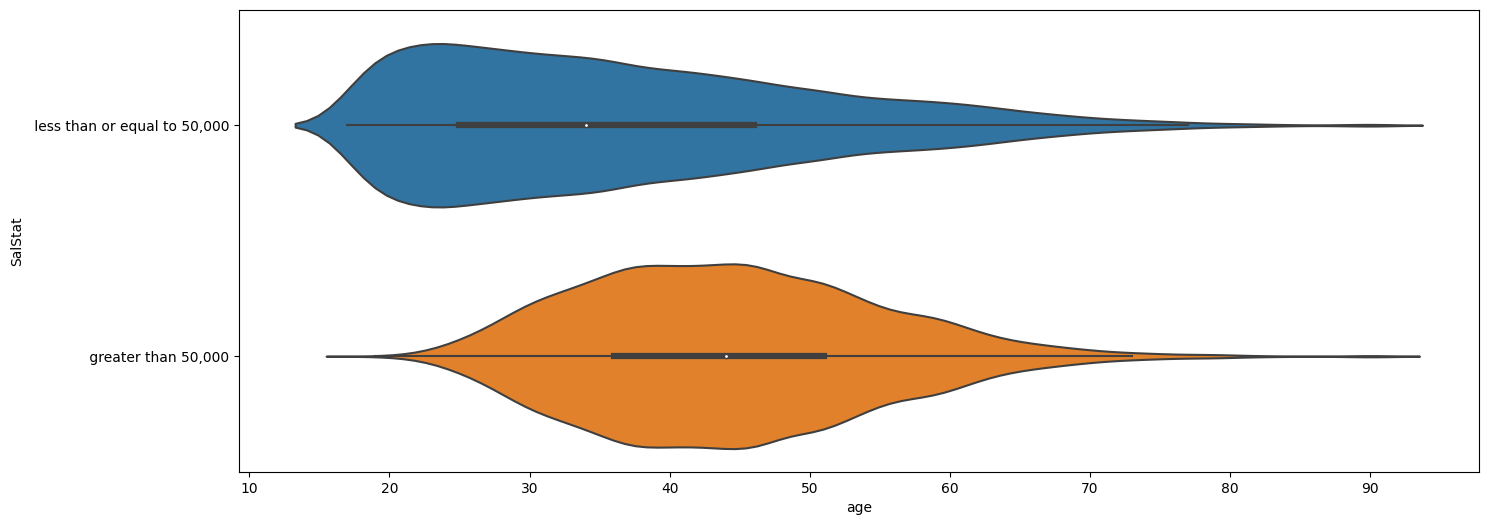

In [12]:
plt.figure(figsize = (16,6))
sns.violinplot(x = 'age',y = 'SalStat',data = df)

In [8]:
# 6. Build a model with reduced number of variables to classify the individual’s salary status to plan subsidy outlay, monitor and prevent misuse

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_ = df.apply(lambda col : le.fit_transform(col) if col.dtype == 'object' else col)

In [9]:
#Divide the data into training and testing sets

from sklearn.ensemble import RandomForestClassifier # give average pridiction of the individual classifier
from sklearn.model_selection import train_test_split # split array and matrices into random train and test subset
from sklearn.metrics import accuracy_score # 

X = df_.drop(["SalStat","maritalstatus","capitalgain","capitalloss"], axis=1)
y = df_["SalStat"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model = RandomForestClassifier()

Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy) 
print(accuracy*100) #displaying the accuracy in percentage 

Accuracy: 0.8123827392120075
81.23827392120076
